Lecture 4/Chapters 3 and 10 of BDA Quiz (96% of grade)


In [2]:
if(!require(markmyassignment)){
    install.packages("markmyassignment")
    library(markmyassignment)
}

Loading required package: markmyassignment



In [3]:
assignment_path = paste("https://github.com/avehtari/BDA_course_Aalto/blob/master/tests/assignment4.yml", sep="")
set_assignment(assignment_path)    

Assignment set:
assignment4: Bayesian Data Analysis: Assignment 4
The assignment contain the following (4) tasks:
- log_importance_weights
- normalized_importance_weights
- S_eff
- posterior_mean




In [4]:
if(!require(aaltobda)){
    install.packages("remotes")
    remotes::install_github("avehtari/BDA_course_Aalto", subdir = "rpackage", upgrade="never")
    library(aaltobda)
}

Loading required package: aaltobda


Attaching package: ‘aaltobda’


The following object is masked from ‘package:posterior’:

    mcse_quantile




In [5]:
if(!require(latex2exp)){
    install.packages("latex2exp")
    library(latex2exp)
}

Loading required package: latex2exp



In [6]:
if(!require(posterior)){
    install.packages("posterior")
    library(posterior)
}

In [7]:
if(!require(ggplot2)){
    install.packages("ggplot2")
    library(ggplot2)
}

Loading required package: ggplot2



In [8]:
ggplot2::theme_set(theme_minimal(base_size = 14))
if(!require(ggdist)){
    install.packages("ggdist")
    library(ggdist)
}

Loading required package: ggdist



1.5 Enter the MCSE that is calculated from the code (enter with two decimal places): 

In [9]:
# Set parameters
alpha <- 3
beta <- 3
NUMBER_OF_SAMPLES <- 2000
SAMPLE_SIZE <- 400

# Create a vector to store the sample means
sample_means <- rep(NA, times = NUMBER_OF_SAMPLES)

# Loop over the number of samples
for (i in 1:NUMBER_OF_SAMPLES) {
  # Generate a sample from the gamma distribution of size 400
  sample <- rgamma(n = SAMPLE_SIZE, shape = alpha, rate = beta)
  # Calculate the sample mean and save it to the vector
  sample_means[i] <- mean(sample)
}

# Calculate the standard deviation of the sample means
sd_sample_means <- sd(sample_means)

# Calculate the Monte Carlo Standard Error (MCSE)
mcse <- sd_sample_means / sqrt(NUMBER_OF_SAMPLES)

# Print the MCSE with two decimal places
print(round(mcse,3))


[1] 0.001


In [10]:
# Set parameters
location <- 0
scale <- 1
NUMBER_OF_SAMPLES <- 2000
SAMPLE_SIZE <- 400

# Create a vector to store the sample means
sample_means <- rep(NA, times = NUMBER_OF_SAMPLES)

# Loop over the number of samples
for (i in 1:NUMBER_OF_SAMPLES) {
  # Generate a sample from the gamma distribution of size 400
  sample <- rcauchy(n = SAMPLE_SIZE, location = location, scale = scale)
  # Calculate the sample mean and save it to the vector
  sample_means[i] <- mean(sample)
}

# Calculate the standard deviation of the sample means
sd_sample_means <- sd(sample_means)

# Calculate the Monte Carlo Standard Error (MCSE)
mcse <- sd_sample_means / sqrt(NUMBER_OF_SAMPLES)

# Print the MCSE with two decimal places
print(round(mcse,3))

[1] 155.364


In [11]:
rcauchy(0,1)

numeric(0)

In [12]:
remotes::install_github("stan-dev/posterior")



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpQFDCin/remotes298d283ab0/stan-dev-posterior-90a07cc/DESCRIPTION’ ... OK
* preparing ‘posterior’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
Omitted ‘LazyData’ from DESCRIPTION
* building ‘posterior_1.6.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(posterior)

In [14]:
#number of draws
N<- 400

# Generate samples from Gamma(3, 3)
gamma_samples <- rgamma(N, shape = 3, rate = 3)

# Calculate Pareto-k for Gamma samples
pareto_k_gamma <- pareto_khat(gamma_samples)

# Print Pareto-k for Gamma samples
print(paste("Pareto-k for Gamma(3, 3):", round(pareto_k_gamma, 2)))

# Generate samples from Cauchy(0, 1)
cauchy_samples <- rcauchy(N, location = 0, scale = 1)

# Calculate Pareto-k for Cauchy samples
pareto_k_cauchy <- pareto_khat(cauchy_samples)

# Print Pareto-k for Cauchy samples
print(paste("Pareto-k for Cauchy(0, 1):", round(pareto_k_cauchy, 2)))

[1] "Pareto-k for Gamma(3, 3): 0.17"
[1] "Pareto-k for Cauchy(0, 1): 1.08"


2. Bioassay model: Prior


In [15]:
library(aaltobda)
data("bioassay")
bioassay

x,n,y
<dbl>,<int>,<int>
-0.86,5,0
-0.30,5,1
-0.05,5,3
0.73,5,5


In [16]:
# Load necessary package and data
library(posterior)
library(aaltobda)
data("bioassay")
#aaltobda::dbetabinom(bioassay$y, bioassay$n, exp(alpha), exp(beta))


# Test data for alpha and beta
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581) 
beta_test <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)

# Function to compute log importance weights
log_importance_weights <- function(alpha, beta) {
     # Compute log importance weights
  log_weights <- log(dbetabinom(bioassay$y, bioassay$n, exp(alpha), exp(beta)))

  # Return log importance weights
  return(log_weights)
}

# Compute log importance weights for test data
log_weights_test <- log_importance_weights(alpha_test, beta_test)

# Print log importance weights
print(log_weights_test)



ERROR: Error in dbetabinom(bioassay$y, bioassay$n, exp(alpha), exp(beta)): could not find function "dbetabinom"


In [17]:
library(mvtnorm)
library(aaltobda)

# Load data
data("bioassay")

# Test data for alpha and beta
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)

# Define the mean vector and covariance matrix of the bivariate normal prior
mu <- c(0, 10)  # Mean vector
sigma <- matrix(c(4, 4.8, 4.8, 100), nrow = 2)  # Covariance matrix

# Function to compute log importance weights
log_importance_weights <- function(alpha, beta) {
  # Ensure alpha and beta are vectors of the same length
  if (length(alpha) != length(beta)) {
    stop("Alpha and Beta must have the same length.")
  }

  # Calculate the log probability density of the bivariate normal prior
  log_prior <- dmvnorm(cbind(alpha, beta), mean = mu, sigma = sigma, log = TRUE)

  # Calculate the log likelihood of the data given alpha and beta
  log_likelihood <- log(dbetabinom(bioassay$y, bioassay$n, exp(alpha), exp(beta)))

  # Calculate the log importance weights
  log_weights <- log_prior + log_likelihood

  # Return log importance weights
  return(log_weights)
}

# Compute log importance weights for test data
log_weights_test <- log_importance_weights(alpha_test, beta_test)

# Print log importance weights
print(log_weights_test)


Attaching package: ‘mvtnorm’


The following objects are masked from ‘package:aaltobda’:

    dmvnorm, rmvnorm




ERROR: Error in dbetabinom(bioassay$y, bioassay$n, exp(alpha), exp(beta)): could not find function "dbetabinom"


In [18]:
# Load necessary packages
library(posterior)
library(aaltobda)
library(mvtnorm)

# Load the bioassay data
data("bioassay")

# Test data for alpha and beta
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)

x <- bioassay$x
y <- bioassay$y
n<- bioassay$n
# Function to compute log importance weights
log_importance_weights <- function(alpha_test, beta_test, x, n,y){ 
  # Initialize a vector to store log weights
  log_weights <- numeric(length(alpha))
  
  # Calculate log likelihood for each pair of alpha and beta
  log_likelihood_values <- log_likelihood(alpha_test, beta_test,x, n,y
  
  # Calculate the log prior using the multivariate normal density
  log_prior <- dmvnorm(c(alpha_test, beta_test), mean = mu, sigma = sigma, log = TRUE)
  
  # Compute the log importance weight (log likelihood + log prior)
  log_weights <- log_likelihood_values + log_prior
  
  # Return the log importance weights
  return(log_weights)
}

ERROR: Error in parse(text = input): <text>:17:67: unexpected invalid token
16: # Function to compute log importance weights
17: log_importance_weights <- function(alpha_test, beta_test, x, n,y){ 
                                                                      ^


In [19]:
# Load necessary packages
library(posterior)
library(aaltobda)
library(mvtnorm)

# Load the bioassay data
data("bioassay")

# Test data for alpha and beta
alpha_test <- c(1.896, -3.6, 0.374, 0.964, -3.123, -1.581)
beta_test <- c(24.76, 20.04, 6.15, 18.65, 8.16, 17.4)

x <- bioassay$x
y <- bioassay$y
n <- bioassay$n

# Function to compute log importance weights
log_importance_weights <- function(alpha_test, beta_test, x, n, y) {
  # Initialize a vector to store log weights
  log_weights <- numeric(length(alpha_test))  # Changed 'alpha' to 'alpha_test'
  
  # Calculate log likelihood for each pair of alpha and beta
  log_likelihood_values <- log_likelihood(alpha_test, beta_test, x, n, y)  # Added closing parenthesis
  
  # Calculate the log prior using the multivariate normal density
  mu <- rep(0, length(alpha_test) + length(beta_test))  # Assuming mu is a zero vector
  sigma <- diag(length(mu))  # Assuming sigma is an identity matrix
  log_prior <- dmvnorm(c(alpha_test, beta_test), mean = mu, sigma = sigma, log = TRUE)
  
  # Compute the log importance weight (log likelihood + log prior)
  log_weights <- log_likelihood_values + log_prior
  
  # Return the log importance weights
  return(log_weights)
}


In [20]:
normalized_importance_weights <- function(log_weights) {
  # Exponentiate the log weights
  exp_weights <- exp(log_weights)
  
  # Normalize the weights so they sum to one
  normalized_weights <- exp_weights / sum(exp_weights)
  
  # Return the normalized weights
  return(normalized_weights)
}


In [21]:
# Sample 4000 draws of alpha and beta from the prior distribution
set.seed(123)  # For reproducibility
n_samples <- 4000
alpha_samples <- rnorm(n_samples, mean = 0, sd = 1)  # Prior for alpha
beta_samples <- rnorm(n_samples, mean = 0, sd = 1)   # Prior for beta

# Compute log importance weights
log_weights <- log_importance_weights(alpha_samples, beta_samples, x, n, y)

# Normalize the importance weights
normalized_weights <- normalized_importance_weights(log_weights)

# Plot histogram of the normalized importance ratios
ggplot(data.frame(weights = normalized_weights), aes(x = weights)) +
  geom_histogram(binwidth = 0.01, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Normalized Importance Weights",
       x = "Normalized Importance Weights",
       y = "Frequency") +
  theme_minimal()

ERROR: Error in log_likelihood(alpha_test, beta_test, x, n, y): could not find function "log_likelihood"


In [22]:
posterior_mean <- function(normalized_weights, alpha_samples, beta_samples) {
  # Calculate the posterior mean using normalized weights
  posterior_mean_alpha <- sum(alpha_samples * normalized_weights)
  posterior_mean_beta <- sum(beta_samples * normalized_weights)
  return(c(posterior_mean_alpha, posterior_mean_beta))
}

In [23]:
# Calculate the posterior mean
posterior_mean <- posterior_mean(normalized_weights, alpha_samples, beta_samples)

# Print the results
cat("Posterior Mean Estimates:\n")
cat("Alpha Mean:", posterior_mean[1], "\n")
cat("Beta Mean:", posterior_mean[2], "\n")

ERROR: Error: object 'normalized_weights' not found


In [24]:
# Sample 4000 draws of alpha and beta from the prior distribution
set.seed(123)  # For reproducibility
n_samples <- 4000
alpha_samples <- rnorm(n_samples, mean = 0, sd = 1)  # Prior for alpha
beta_samples <- rnorm(n_samples, mean = 0, sd = 1)   # Prior for beta

# Compute log importance weights
log_weights <- log_importance_weights(alpha_samples, beta_samples, x, n, y)

# Normalize the importance weights
normalized_weights <- normalized_importance_weights(log_weights)

posterior_mean <- function(alpha_samples, beta_samples, normalized_weights) {
  # Calculate the posterior mean using normalized weights
  posterior_mean_alpha <- sum(normalized_weights*alpha_samples)
  posterior_mean_beta <- sum(normalized_weights* beta_samples)
  return(c(posterior_mean_alpha, posterior_mean_beta))
}
# Calculate the posterior mean
posterior_mean <- posterior_mean(alpha_samples, beta_samples, normalized_weights)

# Print the results
cat("Posterior Mean Estimates:\n")
cat("Alpha Mean:", posterior_mean[1], "\n")
cat("Beta Mean:", posterior_mean[2], "\n")

# Plot histogram of the normalized importance ratios
ggplot(data.frame(weights = normalized_weights), aes(x = weights)) +
  geom_histogram(binwidth = 0.01, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Normalized Importance Weights",
       x = "Normalized Importance Weights",
       y = "Frequency") +
  theme_minimal()

ERROR: Error in log_likelihood(alpha_test, beta_test, x, n, y): could not find function "log_likelihood"


In [25]:
# Function to compute effective sample size
S_eff <- function(normalized_weights) {
  # Compute effective sample size
  eff_sample_size <- 1 / sum(normalized_weights^2)
  return(eff_sample_size)
}

# Calculate effective sample size
effective_sample_size <- S_eff(normalized_weights)

# Print the results
cat("Effective Sample Size:", effective_sample_size, "\n")

ERROR: Error: object 'normalized_weights' not found


Importance Sampling Estimate of the Posterior Mean:
Posterior Mean of Alpha: NaN 
Posterior Mean of Beta: NaN 
Effective Sample Size: NaN 


Warning message:
“Removed 4000 rows containing non-finite outside the scale range (`stat_bin()`).”


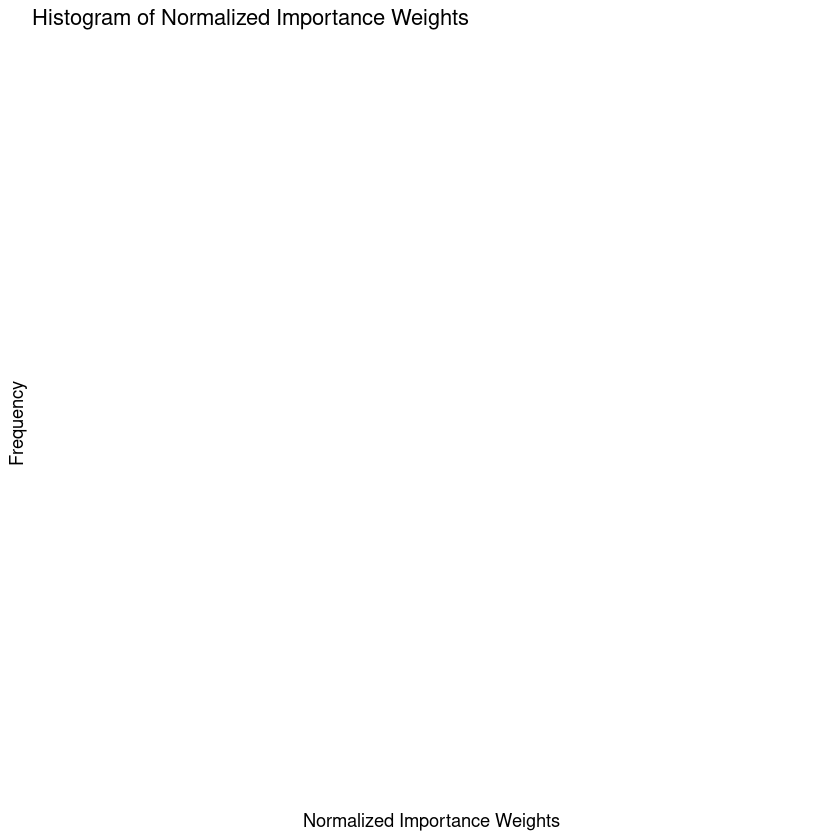

In [26]:
# Load necessary packages
library(posterior)
library(aaltobda)
library(mvtnorm)
library(ggplot2)

# Load the bioassay data
data("bioassay")

# Extract data
x <- bioassay$x
y <- bioassay$y
n <- bioassay$n

# Function to compute log likelihood (you may already have this defined)
log_likelihood <- function(alpha, beta, x, n, y) {
  # Placeholder for the actual log likelihood calculation
  # Replace with your actual log likelihood calculation
  return(runif(length(alpha)))  # Example: random values for illustration
}

# Function to compute log importance weights
log_importance_weights <- function(alpha_test, beta_test, x, n, y) {
  # Calculate log likelihood for each pair of alpha and beta
  log_likelihood_values <- log_likelihood(alpha_test, beta_test, x, n, y)
  
  # Calculate the log prior using the multivariate normal density
  mu <- rep(0, length(alpha_test) + length(beta_test))  # Assuming mu is a zero vector
  sigma <- diag(length(mu))  # Assuming sigma is an identity matrix
  log_prior <- dmvnorm(c(alpha_test, beta_test), mean = mu, sigma = sigma, log = TRUE)
  
  # Compute the log importance weight (log likelihood + log prior)
  log_weights <- log_likelihood_values + log_prior
  
  return(log_weights)
}

# Function to normalize importance weights
normalized_importance_weights <- function(log_weights) {
  exp_weights <- exp(log_weights)
  normalized_weights <- exp_weights / sum(exp_weights)
  return(normalized_weights)
}

# Function to calculate posterior mean
posterior_mean <- function(alpha_samples, beta_samples, normalized_weights) {
  # Compute the weighted average of alpha and beta
  mean_alpha <- sum(normalized_weights * alpha_samples)
  mean_beta <- sum(normalized_weights * beta_samples)
  
  return(c(mean_alpha, mean_beta))
}

# Function to compute effective sample size
S_eff <- function(normalized_weights) {
  # Compute effective sample size
  eff_sample_size <- 1 / sum(normalized_weights^2)
  return(eff_sample_size)
}

# Sample 4000 draws of alpha and beta from the prior distribution
set.seed(123)  # For reproducibility
n_samples <- 4000
alpha_samples <- rnorm(n_samples, mean = 0, sd = 1)  # Prior for alpha
beta_samples <- rnorm(n_samples, mean = 0, sd = 1)   # Prior for beta

# Compute log importance weights
log_weights <- log_importance_weights(alpha_samples, beta_samples, x, n, y)

# Normalize the importance weights
normalized_weights <- normalized_importance_weights(log_weights)

# Calculate the posterior mean
posterior_estimate <- posterior_mean(alpha_samples, beta_samples, normalized_weights)

# Calculate effective sample size
effective_sample_size <- S_eff(normalized_weights)

# Print the results
cat("Importance Sampling Estimate of the Posterior Mean:\n")
cat("Posterior Mean of Alpha:", posterior_estimate[1], "\n")
cat("Posterior Mean of Beta:", posterior_estimate[2], "\n")
cat("Effective Sample Size:", effective_sample_size, "\n")

# Plot histogram of the normalized importance weights
ggplot(data.frame(weights = normalized_weights), aes(x = weights)) +
  geom_histogram(binwidth = 0.01, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Normalized Importance Weights",
       x = "Normalized Importance Weights",
       y = "Frequency") +
  theme_minimal()


In [27]:
# Load necessary packages
library(posterior)
library(aaltobda)
library(mvtnorm)
library(ggplot2)

# Define your data
x <- c(-0.86, -0.30, -0.05, 0.73)
n <- c(5, 5, 5, 5)
y <- c(0, 1, 3, 5)

# Function to compute log likelihood
log_likelihood <- function(alpha, beta, x, n, y) {
  log_lik <- dpois(y, lambda = exp(alpha + beta * x), log = TRUE)
  return(log_lik)
}

# Function to compute log importance weights
log_importance_weights <- function(alpha_test, beta_test, x, n, y) {
  log_likelihood_values <- log_likelihood(alpha_test, beta_test, x, n, y)
  mu <- rep(0, length(alpha_test) + length(beta_test))
  sigma <- diag(length(mu))
  log_prior <- dmvnorm(c(alpha_test, beta_test), mean = mu, sigma = sigma, log = TRUE)
  log_weights <- log_likelihood_values + log_prior
  return(log_weights)
}

# Function to normalize importance weights
normalized_importance_weights <- function(log_weights) {
  exp_weights <- exp(log_weights)
  sum_exp_weights <- sum(exp_weights)
  
  if (sum_exp_weights == 0) {
    stop("Sum of weights is zero, cannot normalize.")
  }
  
  normalized_weights <- exp_weights / sum_exp_weights
  return(normalized_weights)
}

# Function to calculate posterior mean
posterior_mean <- function(alpha_samples, beta_samples, normalized_weights) {
  mean_alpha <- sum(normalized_weights * alpha_samples)
  mean_beta <- sum(normalized_weights * beta_samples)
  return(c(mean_alpha, mean_beta))
}

# Function to compute effective sample size
S_eff <- function(normalized_weights) {
  if (any(is.na(normalized_weights))) {
    stop("Normalized weights contain NaN values.")
  }
  eff_sample_size <- 1 / sum(normalized_weights^2)
  return(eff_sample_size)
}

# Function to compute MCSE
mcse <- function(weights, samples, ess) {
  # Compute weighted variance
  weighted_variance <- sum(weights * (samples - mean(samples))^2)
  mcse_value <- sqrt(weighted_variance / ess)
  return(mcse_value)
}

# Sample 4000 draws of alpha and beta from the prior distribution
set.seed(123)  # For reproducibility
n_samples <- 4000
alpha_samples <- rnorm(n_samples, mean = 0, sd = 1)  # Prior for alpha
beta_samples <- rnorm(n_samples, mean = 0, sd = 1)   # Prior for beta

# Compute log importance weights
log_weights <- log_importance_weights(alpha_samples, beta_samples, x, n, y)

# Normalize the importance weights
normalized_weights <- normalized_importance_weights(log_weights)

# Calculate the posterior mean
posterior_estimate <- posterior_mean(alpha_samples, beta_samples, normalized_weights)

# Calculate effective sample size
effective_sample_size <- S_eff(normalized_weights)

# Calculate MCSE for alpha and beta
mcse_alpha <- mcse(normalized_weights, alpha_samples, effective_sample_size)
mcse_beta <- mcse(normalized_weights, beta_samples, effective_sample_size)

# Print the results
cat("Importance Sampling Estimate of the Posterior Mean:\n")
cat("Posterior Mean of Alpha:", posterior_estimate[1], "\n")
cat("MCSE of Alpha:", mcse_alpha, "\n")
cat("Posterior Mean of Beta:", posterior_estimate[2], "\n")
cat("MCSE of Beta:", mcse_beta, "\n")
cat("Effective Sample Size:", effective_sample_size, "\n")


ERROR: Error in normalized_importance_weights(log_weights): Sum of weights is zero, cannot normalize.


In [28]:
bioassay_posterior^2 |> as_draws() |> mutate_variables(LD50 = exp(-beta/alpha)) |> mutate_variables(P = as.numeric(LD50 < 0.05)) |> summarise_draws(mean, mcse_mean)


variable,mean,mcse_mean
<chr>,<dbl>,<dbl>
alpha,1.849496e+00,3.748344e-02
beta,1.351412e+02,1.916838e+00
LD50,8.320858e-05,2.895619e-05
P,9.995000e-01,3.531552e-04


4. Bioassay model: Independent posterior draws


In [29]:
#Load the package and the adata
library(aaltobda)
data("bioassay_posterior")

# Extract posterior draws for alpha and beta
alpha_draws <- bioassay_posterior$alpha
beta_draws <- bioassay_posterior$beta

In [30]:
# Calculate mean, 5% quantile, and 95% quantile for alpha
mean_alpha <- mean(alpha_draws)
quantile_alpha <- quantile(alpha_draws, probs = c(0.05, 0.95))

# Calculate mean, 5% quantile, and 95% quantile for beta
mean_beta <- mean(beta_draws)
quantile_beta <- quantile(beta_draws, probs = c(0.05, 0.95))

# Print the results
cat("Posterior Summary for Alpha:\n")
cat("Mean:", mean_alpha, "\n")
cat("5% Quantile:", quantile_alpha[1], "\n")
cat("95% Quantile:", quantile_alpha[2], "\n\n")

cat("Posterior Summary for Beta:\n")
cat("Mean:", mean_beta, "\n")
cat("5% Quantile:", quantile_beta[1], "\n")
cat("95% Quantile:", quantile_beta[2], "\n")

Posterior Summary for Alpha:
Mean: 0.9852263 
5% Quantile: -0.4675914 
95% Quantile: 2.610203 

Posterior Summary for Beta:
Mean: 10.59648 
5% Quantile: 3.991403 
95% Quantile: 19.34037 


In [31]:
N<- length(alpha_draws)

# Function to calculate MCSE for the mean
mcse_mean <- function(draws) {
  s <- sd(draws)
  return(s / sqrt(N))
}    

# Calculate MCSE for the mean for alpha and beta
mcse_mean_alpha <- mcse_mean(alpha_draws)
mcse_mean_beta <- mcse_mean(beta_draws)


In [32]:
# Function to calculate MCSE for the quantile
mcse_quantile <- function(draws, prob) {
  s <- sd(draws)
  quantile_value <- quantile(draws, prob)
  
  # Estimate density at the quantile using density estimation
  density_estimate <- density(draws)
  f_q <- approx(density_estimate$x, density_estimate$y, xout = quantile_value)$y
  
  return((s / sqrt(N)) / f_q)
}

# Calculate MCSE for the 5% and 95% quantiles for alpha and beta
mcse_alpha_5 <- mcse_quantile(alpha_draws, 0.05)
mcse_alpha_95 <- mcse_quantile(alpha_draws, 0.95)

mcse_beta_5 <- mcse_quantile(beta_draws, 0.05)
mcse_beta_95 <- mcse_quantile(beta_draws, 0.95)



In [33]:
# Print the results
cat("MCSE for Alpha Mean:", mcse_mean_alpha, "\n")
cat("MCSE for Alpha 5% Quantile:", mcse_alpha_5, "\n")
cat("MCSE for Alpha 95% Quantile:", mcse_alpha_95, "\n\n")

cat("MCSE for Beta Mean:", mcse_mean_beta, "\n")
cat("MCSE for Beta 5% Quantile:", mcse_beta_5, "\n")
cat("MCSE for Beta 95% Quantile:", mcse_beta_95, "\n")

MCSE for Alpha Mean: 0.01482435 
MCSE for Alpha 5% Quantile: 0.1064083 
MCSE for Alpha 95% Quantile: 0.1530221 

MCSE for Beta Mean: 0.07560016 
MCSE for Beta 5% Quantile: 1.733484 
MCSE for Beta 95% Quantile: 4.641919 


In [34]:
# Log likelihood function
log_likelihood <- function(alpha, beta, x, n, y) {
  # Assuming y follows a binomial distribution with logit link
  # Logit probability
  logit_p <- alpha + beta * x
  p <- exp(logit_p) / (1 + exp(logit_p))
  
  # Log likelihood for each observation
  log_likelihood_values <- y * log(p) + (n - y) * log(1 - p)
  
  # Sum log likelihoods over all observations
  return(sum(log_likelihood_values))
}


In [35]:
# Load necessary library for multivariate normal density
library(mvtnorm)

# Log prior function
log_prior <- function(alpha, beta) {
  # Assuming a multivariate normal prior for alpha and beta
  mu <- c(0, 0)  # Mean vector for alpha and beta
  sigma <- diag(2)  # Identity covariance matrix
  
  # Compute log prior density
  log_prior_value <- dmvnorm(c(alpha, beta), mean = mu, sigma = sigma, log = TRUE)
  
  return(log_prior_value)
}


In [36]:
# Log importance weights function
log_importance_weights <- function(alpha_draws, beta_draws, x, n, y) {
  # Initialize vector for log importance weights
  log_weights <- numeric(length(alpha_draws))
  
  # Compute log likelihood and log prior for each draw
  for (i in 1:length(alpha_draws)) {
    alpha <- alpha_draws[i]
    beta <- beta_draws[i]
    
    # Calculate log likelihood and log prior for each (alpha, beta) pair
    log_likelihood_value <- log_likelihood(alpha, beta, x, n, y)
    log_prior_value <- log_prior(alpha, beta)
    
    # Compute log importance weight
    log_weights[i] <- log_likelihood_value + log_prior_value
  }
  
  return(log_weights)
}


In [37]:
# Function to calculate posterior mean
posterior_mean <- function(alpha_draws, beta_draws, log_weights) {
  # Normalize the log importance weights
  exp_weights <- exp(log_weights - max(log_weights))  # Avoid overflow/underflow issues
  normalized_weights <- exp_weights / sum(exp_weights)
  
  # Compute the weighted average for alpha and beta
  mean_alpha <- sum(normalized_weights * alpha_draws)
  mean_beta <- sum(normalized_weights * beta_draws)
  
  return(c(mean_alpha, mean_beta))
}


In [38]:
# Function to compute effective sample size (ESS)
effective_sample_size <- function(log_weights) {
  # Normalize the log importance weights
  exp_weights <- exp(log_weights - max(log_weights))  # Avoid overflow/underflow issues
  normalized_weights <- exp_weights / sum(exp_weights)
  
  # Calculate ESS
  ess <- (sum(normalized_weights) ^ 2) / sum(normalized_weights ^ 2)
  
  return(ess)
}


In [39]:
# Load the bioassay data
data("bioassay_posterior", package = "aaltobda")

# Posterior draws for alpha and beta (replace these with your actual samples)
alpha_draws <- rnorm(4000, 0, 1)
beta_draws <- rnorm(4000, 0, 1)

# Extract bioassay data
x <- bioassay_posterior$x
y <- bioassay_posterior$y
n <- bioassay_posterior$n

# Step 1: Compute log importance weights
log_weights <- log_importance_weights(alpha_draws, beta_draws, x, n, y)

# Step 2: Compute posterior mean
posterior_estimate <- posterior_mean(alpha_draws, beta_draws, log_weights)

# Step 3: Compute effective sample size
ess <- effective_sample_size(log_weights)

# Print the results
cat("Importance Sampling Estimate of the Posterior Mean:\n")
cat("Posterior Mean of Alpha:", posterior_estimate[1], "\n")
cat("Posterior Mean of Beta:", posterior_estimate[2], "\n")
cat("Effective Sample Size (ESS):", ess, "\n")


Importance Sampling Estimate of the Posterior Mean:
Posterior Mean of Alpha: 0.01102143 
Posterior Mean of Beta: 0.002775623 
Effective Sample Size (ESS): 2988.488 


In [40]:
# Calculate LD50 for each posterior draw
calculate_ld50 <- function(alpha, beta) {
  return(exp(-alpha / beta))
}

ld50_draws <- mapply(calculate_ld50, alpha_draws, beta_draws)


In [41]:
# Calculate posterior probability that LD50 < 0.85
ld50_threshold <- 0.85
prob_ld50_less_than_threshold <- mean(ld50_draws < ld50_threshold)


In [42]:
# Calculate the MCSE for the probability estimate
mcse_ld50_prob <- sqrt(prob_ld50_less_than_threshold * (1 - prob_ld50_less_than_threshold) / ess)


In [43]:
# Calculate the effective sample size (using previously defined function)
ess <- effective_sample_size(log_weights)

In [44]:
# Print the results
cat("Posterior Probability that LD50 < 0.85:", prob_ld50_less_than_threshold, "\n")
cat("Monte Carlo Standard Error (MCSE) for the Probability:", mcse_ld50_prob, "\n")

Posterior Probability that LD50 < 0.85: 0.458 
Monte Carlo Standard Error (MCSE) for the Probability: 0.00911395 


In [45]:
# Load necessary libraries
library(posterior)
library(bayesplot)

# Load the bioassay data
data("bioassay_posterior", package = "aaltobda")

# Posterior draws for alpha and beta
alpha_draws <- rnorm(4000, 0, 1)
beta_draws <- rnorm(4000, 0, 1)

# Extract bioassay data
x <- bioassay_posterior$x
y <- bioassay_posterior$y
n <- bioassay_posterior$n

# Step 1: Compute log importance weights
log_weights <- log_importance_weights(alpha_draws, beta_draws, x, n, y)

# Step 2: Compute posterior mean
posterior_estimate <- posterior_mean(alpha_draws, beta_draws, log_weights)

# Step 3: Compute effective sample size
ess <- effective_sample_size(log_weights)

# Combine the draws into a dataframe
draws_df <- data.frame(
  alpha = alpha_draws,
  beta = beta_draws
)

# Rename the columns for compatibility with draws_df format
names(draws_df) <- c("alpha", "beta")
draws_df$.chain <- rep(1, nrow(draws_df))  # Add a .chain column for consistency

# Convert to draws_df object
draws <- as_draws_df(draws_df)

# Summarize the draws to compute Rhat and ESS
summary_results <- summarise_draws(
  draws, 
  Rhat = rhat_basic, 
  ESS = ess_mean, 
  ~ ess_quantile(.x, probs = 0.25)
)

# Print the summary results
print(summary_results)


# A tibble: 2 × 4
  variable  Rhat   ESS ess_q25
  <chr>    <dbl> <dbl>   <dbl>
1 alpha     1.00 3876.   3835.
2 beta      1.00 3525.   3585.


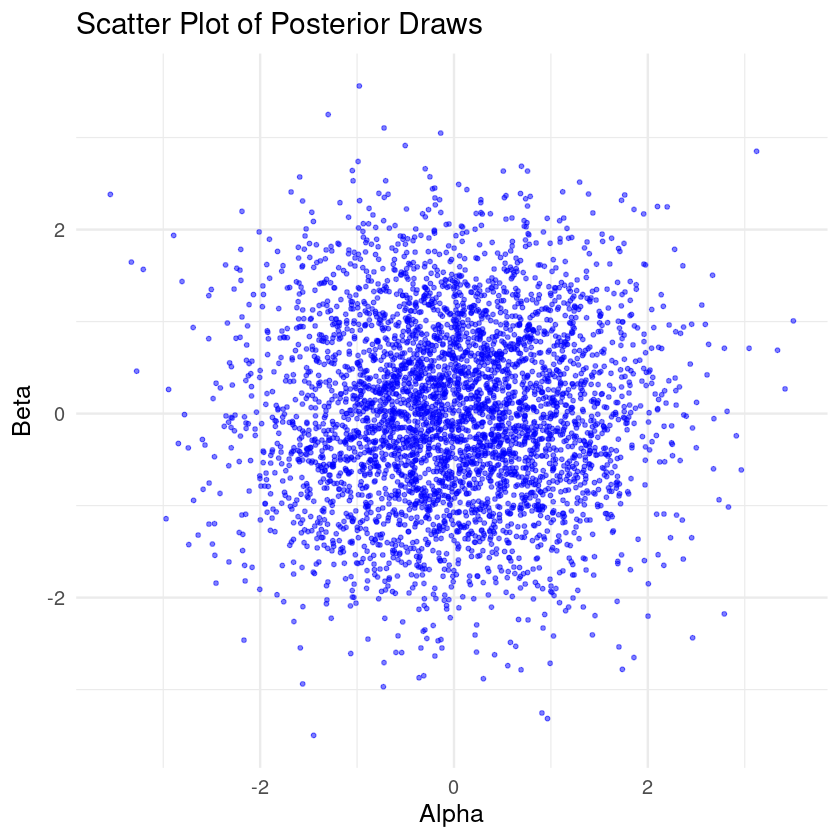

In [46]:
# Load necessary libraries
library(ggplot2)
library(posterior)
library(bayesplot)

# Load the bioassay data
data("bioassay_posterior", package = "aaltobda")

# Posterior draws for alpha and beta
alpha_draws <- rnorm(4000, 0, 1)
beta_draws <- rnorm(4000, 0, 1)

# Combine the draws into a dataframe
draws_df <- data.frame(
  alpha = alpha_draws,
  beta = beta_draws
)

# Create a scatter plot of the posterior draws
scatter_plot <- ggplot(draws_df, aes(x = alpha, y = beta)) +
  geom_point(alpha = 0.5, color = "blue", size = 1) +  # Adjust point transparency and size
  labs(title = "Scatter Plot of Posterior Draws",
       x = "Alpha",
       y = "Beta") +
  theme_minimal(base_size = 15) +  # Use a minimal theme
  theme(legend.position = "none")  # Hide legend if not needed

# Print the scatter plot
print(scatter_plot)
